## **Introduction**


Analysis of data on air quality with respect to carbon monoxide, a major air pollutant. The data includes information from more than 200 sites, identified by state, county, city, and local site names. 

Data source: United States Environmental Protection Agency (EPA) 
[Air Quality Index - A Guide to Air Quality and Your Health](https://www.airnow.gov/sites/default/files/2018-04/aqi_brochure_02_14_0.pdf). (2014,February)

In [1]:
# Import relevant packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load data
df = pd.read_csv("c4_epa_air_quality.csv", index_col = 0)

## **Data exploration** 

In [3]:
df.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


The `aqi` column represents the EPA's Air Quality Index (AQI).

In [4]:
# Get descriptive stats.
df.describe()

,arithmetic_mean,aqi
count,260.000000,260.000000
mean,0.403169,6.757692
std,0.317902,7.061707
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.276315,5.000000
75%,0.516009,9.000000
max,1.921053,50.000000


The 25th percentile for the aqi column is 2. This means that 25% of the aqi values in the data are below 2.

The 75th percentile for the aqi column is 9. This means that 75% of the aqi values in the data are below 9.

In [5]:
# Get descriptive stats 
df["state_name"].describe()

count            260
unique            52
top       California
freq              66
Name: state_name, dtype: object

There are 260 state values, and 52 of them are unique. California is the most commonly occurring state in the data, with a frequency of 66.

## Statistics evaluations

In [6]:
# Compute the mean value from the aqi column.
np.mean(df["aqi"])

6.757692307692308

The mean value for the aqi column is approximately 6.76 

In [7]:
# Compute the median value from the aqi column.
np.median(df["aqi"])

5.0

The median value for the aqi column is 5.0. This means that half of the aqi values in the data are below 5.

The standard deviation for the aqi column is approximately 7.06. This is a measure of how spread out the aqi values are in the data. 

## Explore probability distributions

Let's find out whether **aqi_log** fits a specific type of probability distribution. 

In [8]:
# For this analysis, lets use a modified data sets 
data = pd.read_csv("c4_epa_air_quality_2.csv")

**Reference**

US EPA, OAR. 2014, July 8. [Air Data: Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 

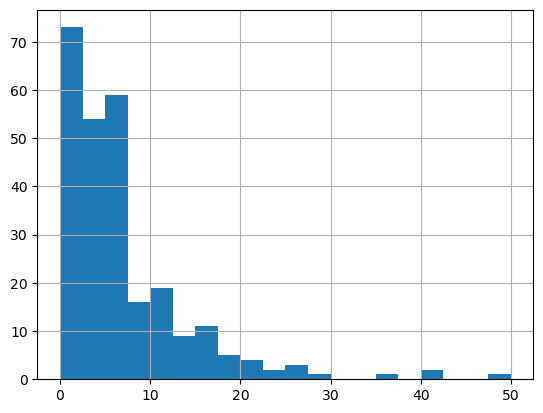

In [9]:
# Create a histogram to visualize distribution of aqi_log.
df["aqi"].hist(bins = 20);

There is a slight right skew, but it still appears to be a bell shape. This shape suggests that the distribution of this data should be approximately normal.

### **Noramal Dist Statistical tests**

Use the empirical rule to observe the data, then test and verify that it is normally distributed.

The empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean


In [10]:
# Define variable for aqi_log mean.
mean_aqi = data["aqi_log"].mean()
mean_aqi

1.7669210929985577

In [11]:
# Define variable for aqi_log standard deviation.
std_aqi = data["aqi_log"].std()

std_aqi

0.7147155520223721

Now, check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

In [12]:
# Define variable for lower and upper limits, 1 standard deviation below the mean.
lower_limit = mean_aqi - 1 * std_aqi
upper_limit = mean_aqi + 1 * std_aqi
print(lower_limit, upper_limit)

1.0522055409761855 2.48163664502093


In [13]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

76.15384615384615

Now, consider the second part of the empirical rule: whether 95% of the `aqi_log` data falls within 2 standard deviations of the mean.

In [14]:
# Define variable for lower and upper limits, 2 standard deviations below the mean.
lower_limit = mean_aqi- 2 * std_aqi
upper_limit = mean_aqi + 2 * std_aqi
print(lower_limit, upper_limit)

0.33748998895381344 3.1963521970433018


In [15]:
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

95.76923076923077

Now, consider the third part of the empirical rule:whether 99.7% of the `aqi_log` data falls within 3 standard deviations of the mean.

In [16]:
# Define variable for lower and upper limits, 3 standard deviations below the mean.
lower_limit = mean_aqi - 3 * std_aqi
upper_limit = mean_aqi + 3 * std_aqi
print(lower_limit, upper_limit)

-0.3772255630685586 3.911067749065674


In [17]:
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

99.61538461538461

- About 76.15% of the data falls within 1 standard deviation of the mean.
- About 95.77% of the data falls within 2 standard deviation of the mean.
- About 99.62% of the data falls within 3 standard deviations of the mean.

The 95.77% is very close to 95%, and the 99.62% is very close to 99.7%. The 76.15% is not as close to 68%, but relatively close. Overall, from applying the empirical rule, the data appears to be not exactly normal, but could be considered approximately normal. 

**How would you use z-score to find outliers?**

Since z-score indicates the relative position of values (for instance, z-score measures how many standard deviations below or above the mean a data point is), it can be used to detect outliers.

Z-score could be used to identify values that lie more than 3 standard deviations below or above the mean. These values may be considered outliers.

In [18]:
# Compute the z-score for every aqi_log value
data["z_score"] = stats.zscore(data["aqi_log"])
data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.438109
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034820
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.936873
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.533584
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.533584


In [19]:
# Display data where aqi_log is above or below 3 standard deviations of the mean
data[(data["z_score"] > 3) | (data["z_score"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.034886


The **aqi_log** for West Phoenix is slightly above 3 standard deviations of the mean. This means that the air quality at that site is worse than the rest of the sites represented in the data.

### **Key takeaways of Normal Dist**

- The empirical rule can be used to verify whether a distribution is normal.
- The mean and standard deviation are important measures when applying the empirical rule to a distribution.
- Z-score allows you to identify potenial outliers in the data.
- The distribution of the `aqi_log` data is approximately normal.
- Using statistical methods, it was determined that the site at West Phoenix has worse air quality than the other sites. 

## Exploring How to Conduct sampling

In [20]:
# Lets use the firt data sets 
df = pd.read_csv("c4_epa_air_quality.csv", index_col = 0)

In [21]:
### Find a population mean
population_mean = df['aqi'].mean()
population_mean

6.757692307692308

### Sample with replacement

In [22]:
### Lets create a set of samples using sample function with a size of 50 with a replacement option
sampled_data = df.sample(n=50, replace=True, random_state=42)

In [23]:
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


- Sampling with replacement is random, allowing sampling units to occur more than once. Row index 102 just happened to be sampled more than once. 

In [24]:
### Finding the sample mean 

sample_mean = sampled_data['aqi'].mean()
sample_mean

5.54

- Due to sampling variability, the sample mean (`sample_mean`) is usually not the same as the population mean (`population_mean`).

### Apply the central limit theorem

According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean.


In [25]:
### To apply the theorem, lets make 10000 samples 
estimate_list = []
for i in range(10000):
    estimate_list.append(df['aqi'].sample(n=50,replace=True).mean())

In [26]:
estimate_df = pd.DataFrame(data={'estimate': estimate_list})
estimate_df

,estimate
0,7.70
1,7.36
2,7.66
3,6.32
4,7.66
...,...
9995,6.36
9996,6.82
9997,7.10
9998,4.96


In [27]:
### Compute the mean of the samples' means 
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

6.758855999999986

The central limit theorem states that if a sample size is large enough and the observations are drawn independently—or with replacement—the sampling distribution of the sample mean is approximately the normal distribution. Furthermore, the mean parameter is the population mean and the variance parameter is the standard error. 

<AxesSubplot:>

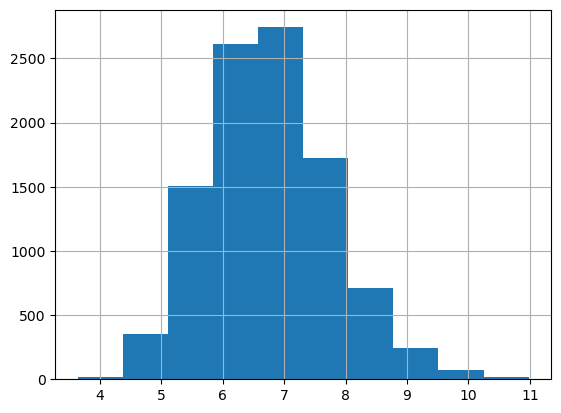

In [28]:
###Create a histogram for the samples' means 
estimate_df['estimate'].hist()

In [29]:
standard_error = sampled_data['aqi'].std() / np.sqrt(len(sampled_data))
standard_error

0.7413225908290327

### Key takeaways on sampling &  central limit theorem

- Sampling with replacement on a dataset leads to duplicate rows.
- Sample means are different from population means due to sampling variability.
- The central limit theorem helps describe the sampling distribution of the sample mean for many different types of datasets.
- Carbon monoxide levels are satisfactory in general.  
- Funding should be allocated to further investigate regions with unhealthy levels of carbon monoxide and improve the conditions in those regions.



## Exploring how confidence intervals work

Data analysis in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: California, Florida, Michigan, Ohio, Pennsylvania, Texas.** 

### The Targets
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
3. Construct a confidence interval for the RRE state with the highest mean AQI.

In [32]:
# lets use the previous datasets
df = pd.read_csv('c4_epa_air_quality.csv')

In [33]:
# Explore the `aqi` DataFrame.
df['state_name'].value_counts()

California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia                  2
Washington               2
Idaho                    2
Nebraska                 2
R

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates.

In [34]:
# Summarize the mean AQI for RRE states.
rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']
aqi_rre = df[df['state_name'].isin(rre_states)]
aqi_rre.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"})

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


<AxesSubplot:xlabel='state_name', ylabel='aqi'>

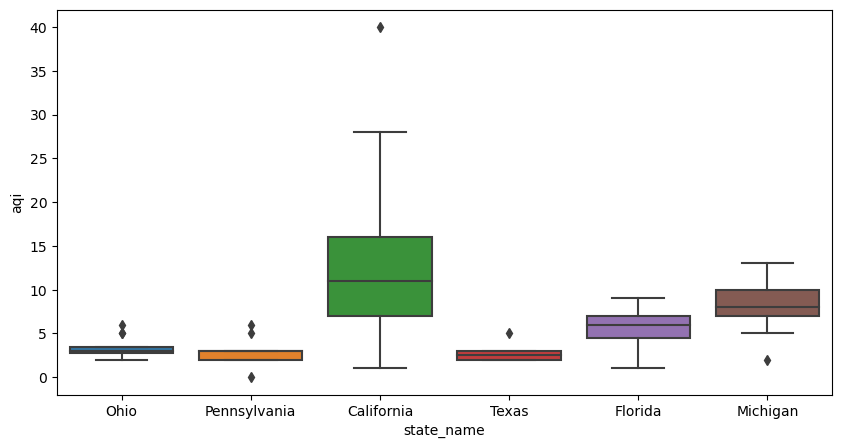

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x=aqi_rre["state_name"],y=aqi_rre["aqi"])

- California: The mean and a signficant portion of the boxplot range over 10.
- Michigan: While the mean is below 10, the boxplot ranges above 10.

### Construct a confidence interval for the RRE state with the highest mean AQI
The four-step process for constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### The confidence interval  will be calculated step by step and then a scipy will be used in short calculations

In [41]:
# Find the mean aqi for your state.
df_ca = df[df['state_name']=='California']

sample_mean = df_ca['aqi'].mean()
sample_mean

12.121212121212121

In [42]:
# Input your confidence level.
confidence_level = 0.95
confidence_level

0.95

### Find your margin of error (ME)
Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [43]:
# Calculate your margin of error.
z_value = 1.96
standard_error = df_ca['aqi'].std() / np.sqrt(df_ca.shape[0])
margin_of_error = standard_error * z_value
print("margin of error:")
print(margin_of_error)

margin of error:
1.7614930896609726


In [44]:
# Calculate your confidence interval (upper and lower limits).

upper_ci_limit = sample_mean + margin_of_error
lower_ci_limit = sample_mean - margin_of_error
(lower_ci_limit, upper_ci_limit)

(10.359719031551148, 13.882705210873095)

### Alternative: Construct the interval using `scipy.stats.norm.interval()`

In [45]:
stats.norm.interval(confidence=confidence_level, loc=sample_mean, scale=standard_error)

(10.359751399400034, 13.882672843024208)

### Key takeaways on confidence intervals

- Based on the mean AQI for RRE states, California and Michigan were most likely to have experienced a mean AQI above 10.
- With California experiencing the highest sample mean AQI in the data, it appears to be the state most likely to be affected by the policy change. 
- Constructing a confidence interval allowed you to estimate the sample mean AQI with a certain degree of confidence.
* Convey that a confidence interval at the 95% level of confidence from this sample data yielded `[10.36 , 13.88]`, which provides the interpretation "given the observed sample AQI measurements, there is a 95% confidence that the population mean AQI for California was between 10.36 and 13.88. This range is notably greater than 10."

## Exploring hypothesis testing

Here, we will construct a hypothesis test and an accompanying visualization, using your results of that test to make a recommendation:

1. ROA is considering a metropolitan-focused approach. Within California, if the mean AQI in Los Angeles County is statistically different from the rest of California.
2. Choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?
3. A new policy will affect those states with a mean AQI of 10 or greater. Can you rule out Michigan from being affected by this new policy?

The steps for conducting hypothesis testing:

1. Formulate the null hypothesis and the alternative hypothesis.<br>
2. Set the significance level.<br>
3. Determine the appropriate test procedure & Compute the p-value.<br>
4. Draw your conclusion.

**Hypothesis 1:** The mean AQI in Los Angeles County is statistically different from the rest of California.

In [49]:
# Create samples
ca_la = df[df['county_name']=='Los Angeles']
mask = ((df['state_name']=='California') & (df['county_name']!='Los Angeles'))
ca_other = df[mask]

**Step 1:** Formulate your null and alternative hypotheses:

*   $H_0$: There is no difference in the mean AQI between Los Angeles County and the rest of California.
*   $H_A$: There is a difference in the mean AQI between Los Angeles County and the rest of California.


**Step 2:** Set the significance level:

In [50]:
# Lets use a significance level of 5%
significance_level = 0.05
significance_level

0.05

**Step 3:** Compute the p-value

Since we are comparing the sample means between two independent samples. Therefore, you will utilize a **two-sample  𝑡-test**.

In [56]:
# Compute p-value
tstat,pvalue = stats.ttest_ind(a=ca_la['aqi'], b=ca_other['aqi'], equal_var=False)
print(tstat)
print(pvalue)

2.1107010796372014
0.049839056842410995


**Step 4:** Draw your conclusion.
With a p-value (0.049) being less than 0.05, null hypothesis is rejected.

Therefore, a metropolitan strategy may make sense in this case.

**Hypothesis 2:** Choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?

In [57]:
# Create the samples
ny = df[df['state_name']=='New York']
ohio = df[df['state_name']=='Ohio']

**Formulate your null and alternative hypotheses:**

*   $H_0$: The mean AQI of New York is greater than or equal to that of Ohio.
*   $H_A$: The mean AQI of New York is **below** that of Ohio.


#### Significance Level (remains at 5%)

**Compute the p-value** The sample means between two independent samples in one direction. Therefore, you will utilize a **two-sample  𝑡-test**.

In [58]:
# Compute p-value
tstat, pvalue = stats.ttest_ind(a=ny['aqi'], b=ohio['aqi'], alternative='less', equal_var=False)
print(tstat)
print(pvalue)

-2.025951038880333
0.030446502691934683


With a p-value (0.030) of less than 0.05 and a t-statistic < 0 (-2.036), **reject the null hypothesis in favor of the alternative hypothesis**.

Therefore, you can conclude at the 5% significance level that New York has a lower mean AQI than Ohio.

**Hypothesis 3:** A new policy will affect those states with a mean AQI of 10 or greater. Can you rule out Michigan from being affected by this new policy?


In [61]:
# Create the samples
michigan = df[df['state_name']=='Michigan']

**Formulate your null and alternative hypotheses here:**

*   $H_0$: The mean AQI of Michigan is less than or equal to 10.
*   $H_A$: The mean AQI of Michigan is greater than 10.


#### Significance Level (remains at 5%)

**Compute the P-value** Determine the appropriate test procedure:

comparing one sample mean relative to a particular value in one direction. Therefore, you will utilize a **one-sample  𝑡-test**.

In [62]:
# Compute p-value
tstat, pvalue = stats.ttest_1samp(michigan['aqi'], 10, alternative='greater')
print(tstat)
print(pvalue)

-1.7395913343286131
0.9399405193140109


With a p-value (0.940) being greater than 0.05 (as your significance level is 5%) and a t-statistic < 0 (-1.74), **fail to reject the null hypothesis**.

Therefore, you cannot conclude at the 5% significance level that Michigan's mean AQI is greater than 10. This implies that Michigan would not be affected by the new policy.

### key takeaways on hypothesis testing
- With the 5% significance level that the Los Angeles mean AQI was stastitically different from the rest of California, and that New York does have a lower mean AQI than Ohio. However Michigan's mean AQI was greater than 10.